In [114]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 30)

In [159]:
df = pd.read_csv('data/final.csv', index_col=0)
df.shape

(30700, 21)

In [116]:
df['number_of_engines'].value_counts()

1    22856
2     3912
0     3762
4      110
3       58
8        1
6        1
Name: number_of_engines, dtype: int64

In [117]:
# get fatality rate for every model in our dataset
injury_counts = df.groupby('model')['injury_severity'].value_counts().unstack(fill_value=0)
injury_counts['fatality_rate'] = injury_counts['fatal'] / (injury_counts['fatal'] + injury_counts['non-fatal'])
injury_counts.head()

injury_severity,fatal,non-fatal,fatality_rate
model,,,
(Ex) Rv6,1,0,1.0
01,1,0,1.0
01A,0,1,0.0
058A,0,1,0.0
058B,0,3,0.0


# Commercial comparison: Boeing vs Airbus
- 1526 accident reports for Boeing
- 266 accident reports for Airbus

In [118]:
boeing_rows = df[df['make'] == 'Boeing']
boeing_rows.shape

(1548, 21)

In [119]:
airbus_rows = df[df['make'] == 'Airbus']
airbus_rows.shape

(268, 21)

# Fatality rate as a manufacturer (all models): Boeing vs Airbus
- basically the same between the two (95% non-fatal)

In [120]:
boeing_fatality = boeing_rows['injury_severity'].value_counts(normalize=True)
print(f'count of boeing_rows: {boeing_rows.shape[0]}\n\nFatality-rate:')
boeing_fatality

count of boeing_rows: 1548

Fatality-rate:


non-fatal    0.956072
fatal        0.043928
Name: injury_severity, dtype: float64

### 'Reciprocating' engine type seems to have noticeably higher fatality rate. Does not support Boeing arg

In [121]:
reciprocating = boeing_rows[boeing_rows['engine_type'] == 'Reciprocating']['injury_severity'].value_counts(normalize=True)
reciprocating

non-fatal    0.895652
fatal        0.104348
Name: injury_severity, dtype: float64

In [122]:
airbus_fatality = airbus_rows['injury_severity'].value_counts(normalize=True)
print(f'count of airbus_rows: {airbus_rows.shape[0]}\n\nFatality-rate:')
airbus_fatality

count of airbus_rows: 268

Fatality-rate:


non-fatal    0.955224
fatal        0.044776
Name: injury_severity, dtype: float64

# top 5 Boeing planes vs top 5 Airbus planes

- 97% of Boeing crashes are non-fatal
- 95% of Airbus crashes are non-fatal

In [123]:
names = boeing_rows['model'].value_counts().index[:5]
top_5_boeing_models  = df[df['model'].isin(names)]
top_5_boeing_models['injury_severity'].value_counts(normalize=True)

non-fatal    0.974633
fatal        0.025367
Name: injury_severity, dtype: float64

In [124]:
names = airbus_rows['model'].value_counts().index[:5]
top_5_airbus_models  = df[df['model'].isin(names)]
top_5_airbus_models['injury_severity'].value_counts(normalize=True)

non-fatal    0.955056
fatal        0.044944
Name: injury_severity, dtype: float64

## Look at fatality rates of those specific models

In [125]:
top_5_boeing_stats = top_5_boeing_models.groupby(['make', 'model']).size().reset_index(name='count')
top_5_boeing_stats = top_5_boeing_stats.merge(injury_counts['fatality_rate'], left_on='model', how='left', right_index=True)
top_3_boeing_stats = top_5_boeing_stats[top_5_boeing_stats['fatality_rate'] != 0].sort_values(by='fatality_rate')
top_3_boeing_stats

,make,model,count,fatality_rate
3,Boeing,767,59,0.016949
1,Boeing,747,75,0.026667
0,Boeing,737,477,0.033543


In [126]:
top_5_airbus_stats = top_5_airbus_models.groupby(['make', 'model']).size().reset_index(name='count')
top_5_airbus_stats = top_5_airbus_stats.merge(injury_counts['fatality_rate'], left_on='model', how='left', right_index=True)
top_3_airbus_stats = top_5_airbus_stats[top_5_airbus_stats['fatality_rate'] != 0]

# combine bottom 3 (duplicate) models -> agg takes dict {col : kwarg}
top_3_airbus_stats = top_3_airbus_stats.groupby('model').agg({'make': 'first',
                                                              'count': 'sum',
                                                              'fatality_rate': 'mean'}).reset_index().sort_values(by='fatality_rate')

top_3_airbus_stats

,model,make,count,fatality_rate
0,A320,Airbus,93,0.043011
2,A330,Airbus,37,0.054054
1,A321,Airbus,20,0.100000


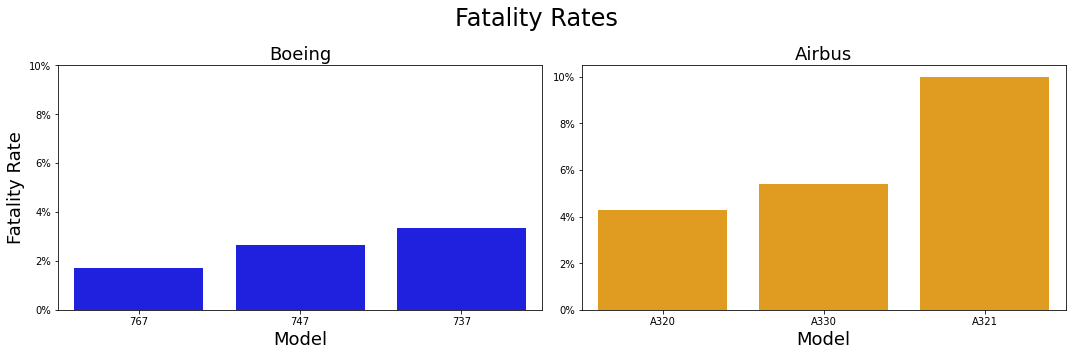

In [127]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

locations = [0, 0.02, 0.04, 0.06, 0.08, 0.1]
labels = ['0%', '2%', '4%', '6%', '8%', '10%']

sns.barplot(data=top_3_boeing_stats, x='model', y='fatality_rate', ax=axes[0], color='blue')
axes[0].set_title('Boeing', fontsize=18)
axes[0].set_xlabel('Model', fontsize=18)
axes[0].set_ylabel('Fatality Rate', fontsize=18)

axes[0].set_yticks(locations)
axes[0].set_yticklabels(labels)

sns.barplot(data=top_3_airbus_stats, x='model', y='fatality_rate', ax=axes[1], color='orange')
axes[1].set_title('Airbus', fontsize=18)
axes[1].set_xlabel('Model', fontsize=18)
axes[1].set_ylabel('')

axes[1].set_yticks(locations)
axes[1].set_yticklabels(labels)

fig.suptitle('Fatality Rates', fontsize=24)

plt.tight_layout()

plt.savefig('plots/boeing_vs_airbus.jpg');

In [128]:
boeing_767 =  boeing_rows[boeing_rows['model'] == '767']
boeing_747 =  boeing_rows[boeing_rows['model'] == '747']
boeing_747

,investigation_type,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,year,state,make_model
54167,Incident,2003-02-13,"Okinawa, Japan",Japan,non-fatal,Unknown,Airplane,Boeing,747,4,Turbo Fan,Unknown,0,0,0,0,Unknown,Unknown,2003,an,Boeing 747
57947,Incident,2004-12-12,"London, United Kingdom",United Kingdom,non-fatal,Unknown,Unknown,Boeing,747,0,Unknown,Unknown,0,0,0,3,Unknown,Unknown,2004,om,Boeing 747
60171,Incident,2006-02-01,"Istanbul, Turkey",Turkey,non-fatal,Minor,Airplane,Boeing,747,0,Turbo Fan,Unknown,0,0,0,0,Unknown,Unknown,2006,ey,Boeing 747
61108,Incident,2006-07-23,"Chicago, IL",United States,non-fatal,Unknown,Unknown,Boeing,747,0,Unknown,Unknown,0,0,0,131,VMC,Landing,2006,IL,Boeing 747
62045,Incident,2007-02-10,"Seoul, Korea, Republic Of","Korea, Republic Of",non-fatal,Unknown,Unknown,Boeing,747,0,Unknown,Unknown,0,0,0,0,Unknown,Unknown,2007,Of,Boeing 747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86956,Incident,2021-01-26,"Karachi, Pakistan",Pakistan,non-fatal,Unknown,Airplane,Boeing,747,4,Unknown,Unknown,0,0,0,10,Unknown,Unknown,2021,an,Boeing 747
86976,Accident,2021-02-01,"Narita, Japan",Japan,non-fatal,Substantial,Airplane,Boeing,747,0,Unknown,Unknown,0,0,0,2,Unknown,Unknown,2021,an,Boeing 747
87141,Incident,2021-03-15,"Mexico City, Mexico",Mexico,non-fatal,Unknown,Airplane,Boeing,747,0,Unknown,Unknown,0,0,0,0,Unknown,Unknown,2021,co,Boeing 747
87171,Incident,2021-03-22,"Dubai, Turks And Caicos",Turks And Caicos,non-fatal,Unknown,Unknown,Boeing,747,0,Unknown,Unknown,0,0,0,0,Unknown,Unknown,2021,os,Boeing 747


In [129]:
boeing_767['number_of_engines'].value_counts(normalize=True)

2    0.559322
0    0.440678
Name: number_of_engines, dtype: float64

In [130]:
# the top 100 models with the most accident reports
top_100 = pd.read_csv('data/top_100_models.csv', index_col=0)

In [131]:
commercial_planes = top_100.sort_values(by='num_seats').tail(6)

# drop 757 and 777
dropped_rows = commercial_planes[commercial_planes['model'].isin(['757', '777'])].index
commercial_planes = commercial_planes.drop(dropped_rows)
commercial_planes

,make,model,count,num_seats,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,avg_fatal_injuries,avg_serious_injuries,avg_minor_injuries,avg_uninjured,Substantial,Destroyed,Unknown,Minor,make_model,fatality_rate
314,Airbus,A320,85,180,283,11,13,4457,3.329412,0.129412,0.152941,52.435294,0.043478,0.043478,0.793478,0.119565,Airbus A320,0.043478
1036,Boeing,737,475,189,1348,383,84,24365,2.837895,0.806316,0.176842,51.294737,0.143158,0.031579,0.566316,0.258947,Boeing 737,0.033684
1184,Boeing,767,59,216,3,64,19,5591,0.050847,1.084746,0.322034,94.762712,0.186441,0.033898,0.525424,0.254237,Boeing 767,0.016949
1123,Boeing,747,75,416,6,72,6,2478,0.080000,0.960000,0.080000,33.040000,0.146667,0.026667,0.386667,0.440000,Boeing 747,0.026667


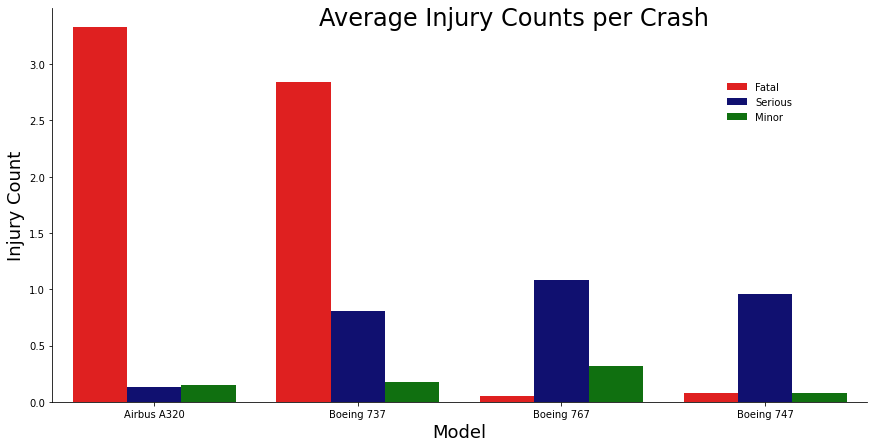

In [208]:
df_melted = commercial_planes.melt(id_vars='make_model', 
                                   value_vars=['avg_fatal_injuries', 'avg_serious_injuries', 'avg_minor_injuries'])

palette = {'avg_fatal_injuries': 'red', 
           'avg_serious_injuries': 'navy', 
           'avg_minor_injuries': 'green'}

plot = sns.catplot(data=df_melted, x='make_model', y='value', kind='bar', hue='variable', height=6, aspect=2, palette=palette)
plot.set_axis_labels('Model', 'Injury Count', fontsize=18)

plot._legend.set_title('')
# move legend
plot._legend.set_bbox_to_anchor((0.8, 0.8))
for t, l in zip(plot._legend.texts, ['Fatal', 'Serious', 'Minor']): 
    t.set_text(l)

plot.fig.suptitle('Average Injury Counts per Crash', fontsize=24)

plot.savefig('plots/top_4_commercial.jpg');

# Boeing 767 and Boeing 747 seem to have the best overall fatality rate and injury counts

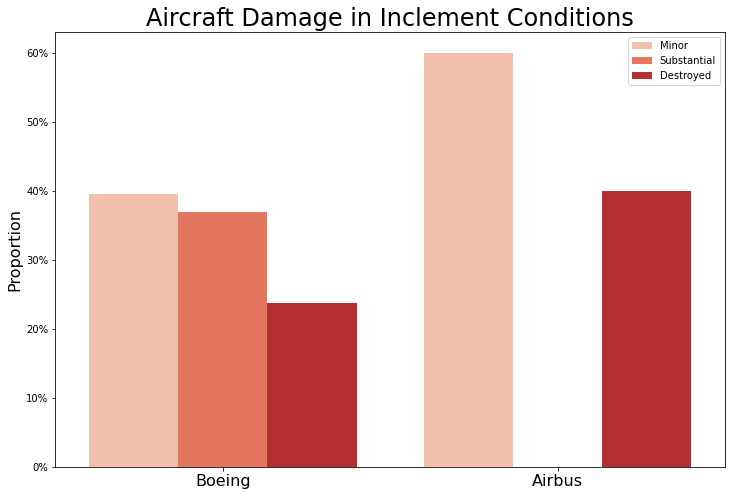

In [222]:
# drop "unknown" weather vals
weather_boeing = boeing_rows[boeing_rows['weather_condition'].isin(['VMC', 'IMC'])]
weather_airbus = airbus_rows[airbus_rows['weather_condition'].isin(['VMC', 'IMC'])]

# boeing v airbus in inclement weather
inclement_boeing = weather_boeing[weather_boeing['weather_condition'] == 'IMC']
inclement_airbus = weather_airbus[weather_airbus['weather_condition'] == 'IMC']

# drop "unknown" aircraft_damage vals
inclement_boeing = inclement_boeing[inclement_boeing['aircraft_damage'] != 'Unknown']
inclement_airbus = inclement_airbus[inclement_airbus['aircraft_damage'] != 'Unknown']

boeing_counts = inclement_boeing['aircraft_damage'].value_counts(normalize=True).reset_index()
boeing_counts.columns = ['aircraft_damage', 'proportion']
boeing_counts['company'] = 'Boeing'

airbus_counts = inclement_airbus['aircraft_damage'].value_counts(normalize=True).reset_index()
airbus_counts.columns = ['aircraft_damage', 'proportion']
airbus_counts['company'] = 'Airbus'

combined = pd.concat([boeing_counts, airbus_counts])

fig, ax = plt.subplots(figsize=(12, 8))

plot = sns.barplot(data=combined, x='company', y='proportion', hue='aircraft_damage', ax=ax, palette='Reds')

ax.set_title('Aircraft Damage in Inclement Conditions', fontsize=24)
locations = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
labels = ['0%', '10%', '20%', '30%', '40%', '50%', '60%']
ax.set_yticks(locations)
ax.set_yticklabels(labels)
ax.legend(loc='upper right')

ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
ax.set_ylabel('Proportion', fontsize=16)

plt.show()

fig.savefig('plots/inclement.jpg');

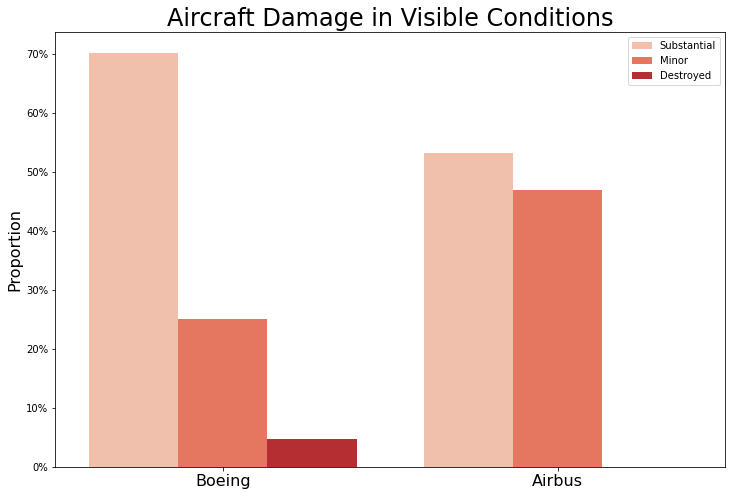

In [221]:
# boeing v airbus in normal weather
normal_boeing = weather_boeing[weather_boeing['weather_condition'] == 'VMC']
normal_airbus = weather_airbus[weather_airbus['weather_condition'] == 'VMC']

# drop "unknown" aircraft_damage vals
normal_boeing = normal_boeing[normal_boeing['aircraft_damage'] != 'Unknown']
normal_airbus = normal_airbus[normal_airbus['aircraft_damage'] != 'Unknown']

boeing_counts = normal_boeing['aircraft_damage'].value_counts(normalize=True).reset_index()
boeing_counts.columns = ['aircraft_damage', 'proportion']
boeing_counts['company'] = 'Boeing'

airbus_counts = normal_airbus['aircraft_damage'].value_counts(normalize=True).reset_index()
airbus_counts.columns = ['aircraft_damage', 'proportion']
airbus_counts['company'] = 'Airbus'

combined = pd.concat([boeing_counts, airbus_counts])

fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(data=combined, x='company', y='proportion', hue='aircraft_damage', ax=ax, palette='Reds')

ax.set_title('Aircraft Damage in Visible Conditions', fontsize=24)
locations = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
labels = ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%']
ax.set_yticks(locations)
ax.set_yticklabels(labels)
ax.legend(loc='upper right')

ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
ax.set_ylabel('Proportion', fontsize=16)

plt.show()

fig.savefig('plots/visible.jpg');

# Look into safety between 2 and 4 engines

In [239]:
# map max number_of_engines to each respective boeing model
true_engines = boeing_rows.groupby('model')['number_of_engines'].max()
boeing_rows.loc[boeing_rows['number_of_engines'] == 0, 'number_of_engines'] = boeing_rows['model'].map(true_engines)

# map max number_of_engines to each respective airbus model
true_engines = airbus_rows.groupby('model')['number_of_engines'].max()
airbus_rows.loc[airbus_rows['number_of_engines'] == 0, 'number_of_engines'] = airbus_rows['model'].map(true_engines)

In [247]:
# boeing engine counts
boeing_rows['number_of_engines'].value_counts()

2    1152
4     129
1     128
0     118
3      21
Name: number_of_engines, dtype: int64

In [248]:
# boeing engine counts
airbus_rows['number_of_engines'].value_counts()

2    245
0     17
4      6
Name: number_of_engines, dtype: int64

In [251]:
# grab rows where engines are either 2 or 4
boeing_2 = boeing_rows[boeing_rows['number_of_engines'] == 2]
boeing_4 = boeing_rows[boeing_rows['number_of_engines'] == 4]

airbus_2 = airbus_rows[airbus_rows['number_of_engines'] == 2]
airbus_4 = airbus_rows[airbus_rows['number_of_engines'] == 4]

# Top 94 recorded private aircraft (1-9 seats)

- range from 47-815 accident records

In [84]:
private_planes = top_100.sort_values(by='num_seats').head(94)
private_planes.sort_values(by='count')

,make,model,count,num_seats,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,avg_fatal_injuries,avg_serious_injuries,avg_minor_injuries,avg_uninjured,Substantial,Destroyed,Unknown,Minor,make_model,fatality_rate
3288,Luscombe,8,47,4,6,16,7,35,0.127660,0.340426,0.148936,0.744681,0.958333,0.020833,0.020833,0.000000,Luscombe 8,0.104167
2032,Cirrus Design Corp.,Sr22,47,5,205,81,49,329,4.361702,1.723404,1.042553,7.000000,0.703470,0.233438,0.028391,0.034700,Cirrus Design Corp. Sr22,0.340694
4289,Robinson,R22 Beta,47,2,22,6,19,45,0.468085,0.127660,0.404255,0.957447,0.760000,0.220000,0.020000,0.000000,Robinson R22 Beta,0.320000
1924,Cessna,U206,49,6,43,21,18,49,0.877551,0.428571,0.367347,1.000000,0.714286,0.244898,0.020408,0.020408,Cessna U206,0.367347
1564,Cessna,172H,49,6,11,8,20,59,0.224490,0.163265,0.408163,1.204082,0.880000,0.080000,0.020000,0.020000,Cessna 172H,0.160000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569,Cessna,172N,311,2,117,67,54,335,0.376206,0.215434,0.173633,1.077170,0.887821,0.092949,0.016026,0.003205,Cessna 172N,0.166667
1603,Cessna,182,318,4,149,88,47,347,0.468553,0.276730,0.147799,1.091195,0.808176,0.160377,0.015723,0.015723,Cessna 182,0.242138
1574,Cessna,172S,328,6,71,35,30,373,0.216463,0.106707,0.091463,1.137195,0.896970,0.063636,0.027273,0.012121,Cessna 172S,0.115152
1531,Cessna,152,381,2,59,53,47,368,0.154856,0.139108,0.123360,0.965879,0.890052,0.070681,0.023560,0.015707,Cessna 152,0.102094


In [85]:
# Seperate private planes by seat size (1 seat, 2-4 seats, 5-9 seats)
private_planes['seat_range'] = private_planes['num_seats'].map(lambda x: '1' if x == 1 else '2-4' if x < 5 else '5-9')
private_planes

,make,model,count,num_seats,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,avg_fatal_injuries,avg_serious_injuries,avg_minor_injuries,avg_uninjured,Substantial,Destroyed,Unknown,Minor,make_model,fatality_rate,seat_range
1772,Cessna,A188B,69,1,13,7,7,41,0.188406,0.101449,0.101449,0.594203,0.855072,0.115942,0.014493,0.014493,Cessna A188B,0.188406,1
240,Air Tractor,At502,57,1,21,14,7,32,0.368421,0.245614,0.122807,0.561404,0.797297,0.175676,0.027027,0.000000,Air Tractor At502,0.270270,1
4018,Piper,Pa38112,55,2,20,12,6,40,0.363636,0.218182,0.109091,0.727273,0.875000,0.107143,0.017857,0.000000,Piper Pa38112,0.232143,2-4
1514,Cessna,140,134,2,18,31,10,164,0.134328,0.231343,0.074627,1.223881,0.962963,0.014815,0.014815,0.007407,Cessna 140,0.088889,2-4
998,Bellanca,7Gcbc,59,2,27,18,15,108,0.457627,0.305085,0.254237,1.830508,0.954128,0.036697,0.009174,0.000000,Bellanca 7Gcbc,0.183486,2-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3976,Piper,Pa31350,75,6,81,15,25,142,1.080000,0.200000,0.333333,1.893333,0.720000,0.213333,0.026667,0.040000,Piper Pa31350,0.280000,5-9
1866,Cessna,R182,59,6,20,9,2,76,0.338983,0.152542,0.033898,1.288136,0.796610,0.169492,0.000000,0.033898,Cessna R182,0.169492,5-9
1564,Cessna,172H,49,6,11,8,20,59,0.224490,0.163265,0.408163,1.204082,0.880000,0.080000,0.020000,0.020000,Cessna 172H,0.160000,5-9
1659,Cessna,208B,122,9,119,75,111,301,0.975410,0.614754,0.909836,2.467213,0.688000,0.192000,0.080000,0.040000,Cessna 208B,0.280000,5-9


# Fatality rates range from 3% - 56%

- Fatality rate
- Chance of death upon crash

In [173]:
private_planes['fatality_rate'].describe()

count    94.000000
mean      0.216426
std       0.108847
min       0.033898
25%       0.129602
50%       0.212436
75%       0.282278
max       0.569231
Name: fatality_rate, dtype: float64

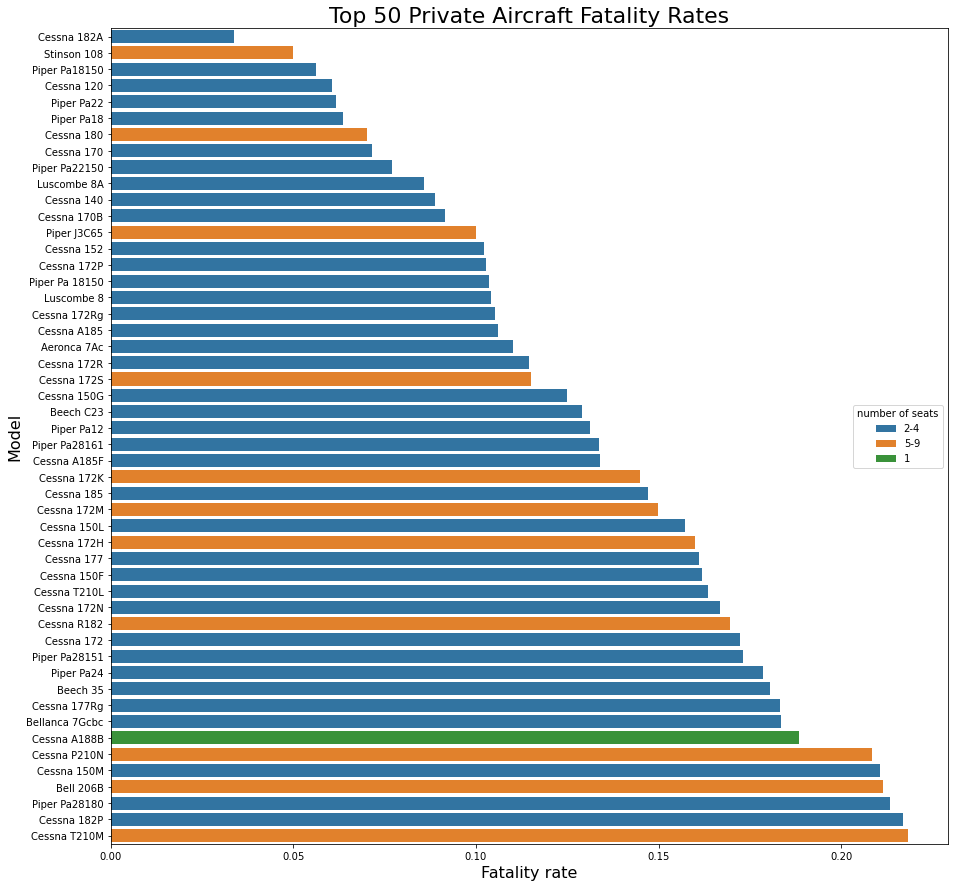

In [88]:
x = 50
fig, ax = plt.subplots(figsize=(15,15))

sorted_data = private_planes.sort_values(by='fatality_rate').head(x)
sns.barplot(data=sorted_data, x='fatality_rate', y='make_model', hue='seat_range', orient='h', dodge=False)

ax.set_xlabel('Fatality rate', fontsize=16)
ax.set_ylabel('Model', fontsize=16)
ax.set_title(f'Top {x} Private Aircraft Fatality Rates', fontsize=22)

ax.legend().set_title('number of seats');